# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [316]:
m = 1
A = 0.09#0.001#0.049261572870865834#0.0495#0.04922733211517334#0.04926157287086606#0.049261573076248164#0.04925#55#0.05#0.049375#0.07#0.05#0.1124921875#0.125
run = 1

1

Choose your grid

In [317]:
global loggrid=false
global bisection=false
global meshrefinement=false;

In [318]:
using Quadmath, Printf

res=m;
N=2.0^m*200.0/2.0
Xf=10.0#Float128(1.0);

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=2.0^m*200.0/2.0
Tf=Nt*dt; #final time
#print(Tf)

In [319]:
print(N)

200.0

In [320]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [321]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [322]:
ori=0.0#Float128(0.0)#0.0;
initX1 = nothing
N=int(N)
initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX);
println("step size is  ", dx)
println("the time step is ", dt)

if loggrid==true
    global originalX=initX
    xtilde=gridfunc(initX1)
    initX1=xtilde
    initX=collect(initX)
    initX[4:L-3]=xtilde
    #global dergrid_func = der_grid(initX)
    global jacobian_func = Spline1D(originalX[4:L-3], analytic_jacobian(originalX[4:L-3]),  k=4);
end;

step size is  0.05
the time step is 0.025


# Initial data of m β Ψ and Ψ,x

In [323]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)
#initm=Array{Float128}(undef, L)
#initbeta=Array{Float128}(undef, L)
#initpsi=Array{Float128}(undef, L)
#initderpsi=Array{Float128}(undef, L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7#Float128(0.7)#0.01#0.7#0.01#0.7#0.7#0.7#0.01#0.7#0.3
sigma=0.3#Float128(0.3)

#PSI
initpsi[4:L-3] = init_gaussian(initX1,r0,sigma,A)

#PSI,X FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,3] = initpsi
state_array[:,4] = initderpsi
state_array=ghost(state_array)

####

derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);

In [324]:
#derpsi_func(state_array[:,5]); #doesnt output the quad precision
#coef=splinethree(state_array[4:L-3,5],state_array[4:L-3,4],state_array[4:L-3,5]);

In [325]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [326]:
y0=Float128.([0.0 0.0 0.0])
#state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:],coef);

state_array[4:L-3,1:3] = twod_n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

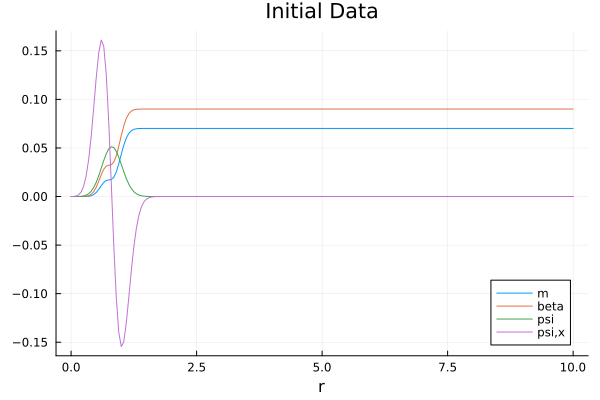

In [327]:
using Plots #showing initial data and the initial status of the horizon finder
plot(initX[4:L-3], state_array[4:L-3,1:4], xaxis="r",title="Initial Data", labels=["m" "beta" "psi" "psi,x"])

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [328]:
using CSV, Tables
#CSV.write(dir*"/res$res/time_step0.csv", Tables.table(state_array), writeheader=false)

global files=["m", "beta", "psi", "derpsi"]

print_muninn(files, 0, state_array[:,1:5],res,"w")

In [329]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [330]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx,ginit)/dt)

0.018516911968406456


In [331]:
using Base.Threads
Threads.nthreads()

4

 ## Time evolution

fixed grid

In [332]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,dir*"/res$res",run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 20 dt is 0.0004625079858593892, t=0.009254312264355335 speed is 54.05312073379086, dx/dt=108.10624146758173


iteration 40 dt is 0.0004620683152156383, t=0.01849986060616182 speed is 54.104553757019644, dx/dt=108.20910751403929


iteration 60 dt is 0.0004616255322546777, t=0.02773658287116561 speed is 54.156449878096346, dx/dt=108.31289975619269


iteration 80 dt is 0.00046117962838711164, t=0.036964416720577396 speed is 54.20881249120384, dx/dt=108.41762498240767


iteration 100 dt is 0.00046073059640277153, t=0.04618329965822999 speed is 54.26164486403016, dx/dt=108.52328972806032


iteration 120 dt is 0.0004602784305114039, t=0.0553931690585984 speed is 54.31495013186502, dx/dt=108.62990026373004


iteration 140 dt is 0.000459823126378544, t=0.06459396219558251 speed is 54.368731292168725, dx/dt=108.73746258433745


iteration 160 dt is 0.0004593646811569137, t=0.0737856162719598 speed is 54.422991199578725, dx/dt=108.84598239915745


iteration 180 dt is 0.000458903093513



iteration 1440 dt is 0.00042451898321991394, t=0.640432276442121 speed is 58.89018156591888, dx/dt=117.78036313183776


iteration 1460 dt is 0.0004239219054294467, t=0.648916386873391 speed is 58.97312613433879, dx/dt=117.94625226867758


iteration 1480 dt is 0.0004233248325306637, t=0.6573885556157435 speed is 59.05630399839376, dx/dt=118.11260799678752


iteration 1500 dt is 0.00042272787748229903, t=0.6658487839463703 speed is 59.1397003407868, dx/dt=118.2794006815736


iteration 1520 dt is 0.00042213115742373227, t=0.6742970754450449 speed is 59.223299584363964, dx/dt=118.44659916872793


iteration 1540 dt is 0.0004215347939830256, t=0.6827334360809266 speed is 59.30708533874123, dx/dt=118.61417067748246


iteration 1560 dt is 0.0004209389136096183, t=0.6911578743057867 speed is 59.39104034269727, dx/dt=118.78208068539455


iteration 1580 dt is 0.0004203436479311091, t=0.6995704011541432 speed is 59.47514640234863, dx/dt=118.95029280469726


iteration 1600 dt is 0.000419749134132



iteration 2840 dt is 0.0003956909518345238, t=1.2094294953252316 speed is 63.180620845873904, dx/dt=126.36124169174781


iteration 2860 dt is 0.0003957877475942146, t=1.2173442846814746 speed is 63.16516908863865, dx/dt=126.33033817727731


iteration 2880 dt is 0.0003959126047559645, t=1.2252613033689228 speed is 63.14524897586851, dx/dt=126.29049795173702


iteration 2900 dt is 0.0003960662533490596, t=1.233181120312102 speed is 63.1207526230898, dx/dt=126.24150524617959


iteration 2920 dt is 0.00039624940214504713, t=1.2411043188212605 speed is 63.09157784129287, dx/dt=126.18315568258573


iteration 2940 dt is 0.0003964627336118941, t=1.249031496114315 speed is 63.05762907964268, dx/dt=126.11525815928536


iteration 2960 dt is 0.0003967068988377983, t=1.2569632627374998 speed is 63.018818359954366, dx/dt=126.03763671990873


iteration 2980 dt is 0.00039698251246093235, t=1.2649002418844943 speed is 62.97506619377923, dx/dt=125.95013238755845


iteration 3000 dt is 0.00039729014763



iteration 4220 dt is 0.00045928674593659813, t=1.7897853973040152 speed is 54.432226100970716, dx/dt=108.86445220194143


iteration 4240 dt is 0.00046062126973544197, t=1.7989851757395987 speed is 54.27452365445209, dx/dt=108.54904730890418


iteration 4260 dt is 0.0004619339510288218, t=1.8082114257308404 speed is 54.12029131939721, dx/dt=108.24058263879442


iteration 4280 dt is 0.00046321897075361047, t=1.8174636477327692 speed is 53.970155754475094, dx/dt=107.94031150895019


iteration 4300 dt is 0.00046447166616387286, t=1.8267412373165435 speed is 53.82459646350012, dx/dt=107.64919292700024


iteration 4320 dt is 0.000465688887486277, t=1.836043512148358 speed is 53.68390930465719, dx/dt=107.36781860931438


iteration 4340 dt is 0.0004668692782540057, t=1.8453697453368632 speed is 53.54817968210463, dx/dt=107.09635936420926


iteration 4360 dt is 0.00046801346119424315, t=1.854719203418714 speed is 53.4172669653706, dx/dt=106.8345339307412


iteration 4380 dt is 0.0004691241203



iteration 5600 dt is 0.0006197456551495272, t=2.5233240624504845 speed is 40.339129112519885, dx/dt=80.67825822503977


iteration 5620 dt is 0.0006198420768521057, t=2.5357200997714564 speed is 40.3328540181776, dx/dt=80.6657080363552


iteration 5640 dt is 0.000619882171541038, t=2.5481174383471425 speed is 40.33024524297829, dx/dt=80.66049048595659


iteration 5660 dt is 0.0006198861642401135, t=2.5605151682879432 speed is 40.32998547506898, dx/dt=80.65997095013796


iteration 5680 dt is 0.0006198716217149646, t=2.5729127565302408 speed is 40.33093163844779, dx/dt=80.66186327689557


iteration 5700 dt is 0.0006198533637297074, t=2.585309992564791 speed is 40.33211959934039, dx/dt=80.66423919868078


iteration 5720 dt is 0.0006198434689498003, t=2.5977069334182485 speed is 40.332763435190266, dx/dt=80.66552687038053


iteration 5740 dt is 0.0006198513559363365, t=2.610103849571808 speed is 40.33225024124605, dx/dt=80.6645004824921


iteration 5760 dt is 0.0006198839221952045, t=2.62



iteration 7000 dt is 0.0006241349439669989, t=3.3954089385121256 speed is 40.05544032048601, dx/dt=80.11088064097201


iteration 7020 dt is 0.0006241363364534223, t=3.407891651213969 speed is 40.05535095434343, dx/dt=80.11070190868686


iteration 7040 dt is 0.0006241382177197012, t=3.4203743968763134 speed is 40.05523022021932, dx/dt=80.11046044043864


iteration 7060 dt is 0.0006241405863155115, t=3.432857185306543 speed is 40.05507821175751, dx/dt=80.11015642351502


iteration 7080 dt is 0.0006241434141387964, t=3.4453400259975613 speed is 40.05489673314173, dx/dt=80.10979346628346


iteration 7100 dt is 0.0006241466502602927, t=3.457822927633524 speed is 40.05468905356467, dx/dt=80.10937810712934


iteration 7120 dt is 0.0006241502254411044, t=3.4703058976798133 speed is 40.05445961720482, dx/dt=80.10891923440964


iteration 7140 dt is 0.0006241540570604196, t=3.482788942068135 speed is 40.05421372688433, dx/dt=80.10842745376866


iteration 7160 dt is 0.0006241580541810263, t=3.49



iteration 8420 dt is 0.0006241982843078485, t=4.2817533028573616 speed is 40.051375706233515, dx/dt=80.10275141246703


iteration 8440 dt is 0.0006241984124648745, t=4.294237269921092 speed is 40.0513674831027, dx/dt=80.1027349662054


iteration 8460 dt is 0.0006241985214153702, t=4.306721239346169 speed is 40.05136049235186, dx/dt=80.10272098470372


iteration 8480 dt is 0.000624198611535804, t=4.319205210751425 speed is 40.051354709823805, dx/dt=80.10270941964761


iteration 8500 dt is 0.0006241986837584622, t=4.331689183769197 speed is 40.051350075697876, dx/dt=80.10270015139575


iteration 8520 dt is 0.000624198739486724, t=4.344173158055555 speed is 40.05134649992628, dx/dt=80.10269299985256


iteration 8540 dt is 0.000624198780496882, t=4.3566571332987305 speed is 40.051343868533685, dx/dt=80.10268773706737


iteration 8560 dt is 0.0006241988088324369, t=4.369141109225465 speed is 40.05134205039973, dx/dt=80.10268410079946


iteration 8580 dt is 0.0006241988266965925, t=4.38162

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [194]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step710.csv" is not a valid file or doesn't exist

In [139]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [140]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

In [141]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8200:5:8430
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    plot!(initX1, [plot1], labels=["monitor ratio"], ylim=[0, 1],xlim=[0, 1])# |> display 
    #plot!(initX[4:L-3], [plot1], labels=["m" "beta" "psi" "psi,x"],ylim=[-1,1])#, xlim=[0, 0.1]) |> display 
    
    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

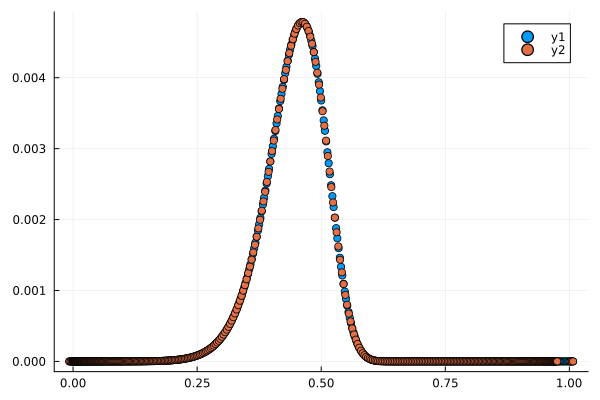

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

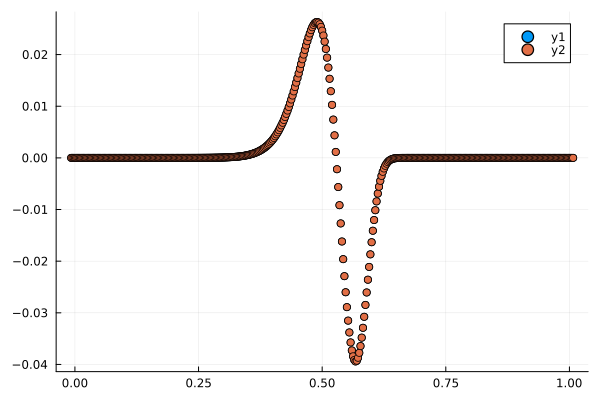

In [417]:
scatter([x1,x1],[y1,y2])